In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Datasets\\dat2.csv')
df.rename(columns={'GSDP_%': 'GSDP_percent'}, inplace=True)
df["GSDP_per_capita"] = df["GSDP_percent"]/df["Population"]
##
df["Energy_Looss"] = df["Energy_Produced"] * df["AT&C_loss"]
df["ACS/ARR"] = np.where(df["ARR"] == 0, 0, df["ACS"] / df["ARR"])
#
df["ACS-ARR"] = df["ACS"]-df["ARR"]
##
df["Railways/Commercial"] = df["Railways"]*df["Commercial_sector"]
##
df["Railway_Loss"] = df["Railways"]/(df["Rural_popul"] + df["Urban_popul"])
##
df["Energy_Consumption_per_capita"] = df["Energy_Consumption"]/df["Population"]
df["Industrial_share"] = np.where(df["Energy_Produced"] == 0,0,df["Industrial"]/df["Energy_Produced"])
df["Urban_population"] = df["Urban_popul"]*df["Population"]
df["public_cost"] = df["Public_services"]/df["Population"]
##
df["Total_Demand"] = df["Industrial"] + df["Commercial_sector"] + df["Agro_sector"] + df["Domestic_sector"] + df["Public_services"] + df["Peak_Demand"]
df["Energy_Efficiancy"] = df["Energy_Produced"]/(df["AT&C_loss"] + df["Peak_Demand"])
df["Economic_index"] = df["GSDP_percent"] + df["GSDP_per_capita"] + df["ACS"] + df["ARR"]
df["Freight-Passenger_ratio"] = (df["Railways"] * 0.6) / (df["Railways"] * 0.4)
df["Railway_Utilization"] = df["Railways"]/(df["Peak_Demand"] + 1)
df["Raiwlay_dependancy"] = df["Railways"]/(df["Energy_Produced"] + 1)
df["Freight_Passenger_Ratio"] = (df["Industrial"] + df["Commercial_sector"])/(df["Railways"] + 1)
df["Raiwlays"] = df["Railways"] * df["Energy_Produced"]
df["Energy_Consumption"] = df["Energy_Consumption"]/df["Population"]
df["Energy_performance"] = df["AT&C_loss"]*df["Energy_Produced"]
df["Railway_mon_loss"] = df["Railways"]/df["AT&C_loss"]
# data = df.drop(columns=["Year","GSDP_%", "Population","ACS","ARR", ])
data = df.drop(columns=["Year"])
df

,Year,Population,GSDP_percent,Urban_popul,Rural_popul,Energy_Produced,Peak_Demand,ACS,ARR,Agro_sector,...,Total_Demand,Energy_Efficiancy,Economic_index,Freight-Passenger_ratio,Railway_Utilization,Raiwlay_dependancy,Freight_Passenger_Ratio,Raiwlays,Energy_performance,Railway_mon_loss
0,A&N_Islands,0.04,0.04,0.01,0.02,207.88,0.0,19.61,4.07,0.00,...,86.38,11.176344,24.720000,NaN,0.000000,0.000000,31.890000,0.0000,3.866568e+03,0.000000
1,AP,4.09,4.72,29.47,70.53,61337.18,7391.0,5.47,4.82,22.78,...,7482.82,8.287688,16.164034,1.5,0.000381,0.000046,11.390052,172970.8476,6.133718e+05,0.282000
2,AR,0.11,0.12,22.94,77.06,1298.72,139.0,0.00,0.00,0.00,...,220.08,6.526231,1.210909,NaN,0.000000,0.000000,33.860000,0.0000,7.792320e+04,0.000000
3,Assam,2.58,1.83,14.10,85.90,4613.04,1491.0,5.06,4.63,0.47,...,1582.97,3.042902,12.229302,NaN,0.000000,0.000000,47.270000,0.0000,1.153260e+05,0.000000
4,Bihar,8.60,2.67,11.29,88.71,20992.11,3615.0,5.00,4.92,2.53,...,3684.42,5.746540,12.900465,1.5,0.001153,0.000199,5.009671,87537.0987,7.977002e+05,0.109737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Telangana,2.89,4.41,39.23,60.77,58649.08,13184.0,7.38,6.48,33.50,...,13275.86,4.439765,19.795952,1.5,0.000096,0.000021,16.141593,73897.8408,1.521944e+06,0.048555
62,Tripura,0.30,0.26,26.17,73.83,6121.04,320.0,5.54,5.78,3.76,...,406.63,17.105044,12.446667,NaN,0.000000,0.000000,12.250000,0.0000,2.316814e+05,0.000000
63,Uttarakhan,0.83,1.31,30.23,69.77,17735.28,2233.0,5.94,5.48,1.48,...,2329.88,7.870628,14.308313,1.5,0.000103,0.000013,54.756098,4079.1144,3.609129e+05,0.011302
64,UP,16.50,7.85,22.27,77.73,129323.44,21812.0,7.30,7.34,17.13,...,21903.09,5.922040,22.965758,1.5,0.000072,0.000012,12.298450,204331.0352,3.317146e+06,0.061598


In [306]:
# data['log_industrial_usage'] = np.log1p(data['Industrial'])
X = data.drop(columns=["Energy_Consumption"])  # All columns except "Energy_Consumption"
y = data["Energy_Consumption"]  # Only "Energy_Consumption"
X = X.fillna(0)
y = y.fillna(0)

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Align the columns of X_test to match X_train
X_test_aligned = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize separate scalers for X and y
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Scale X data
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test_aligned)
X_valid_scaled = x_scaler.transform(X_valid)

# Reshape and scale y data
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))
y_valid_scaled = y_scaler.transform(y_valid.values.reshape(-1, 1))

X_test


,Population,GSDP_percent,Urban_popul,Rural_popul,Energy_Produced,Peak_Demand,ACS,ARR,Agro_sector,Commercial_sector,...,Total_Demand,Energy_Efficiancy,Economic_index,Freight-Passenger_ratio,Railway_Utilization,Raiwlay_dependancy,Freight_Passenger_Ratio,Raiwlays,Energy_performance,Railway_mon_loss
54,0.16,0.013,28.86,71.14,256.72,192.0,8.9100,5.8300,0.00,14.37,...,275.99,1.048136,14.834250,0.0,0.000000,0.000000,24.250000,0.0000,1.358819e+04,0.000000
62,0.30,0.260,26.17,73.83,6121.04,320.0,5.5400,5.7800,3.76,7.86,...,406.63,17.105044,12.446667,0.0,0.000000,0.000000,12.250000,0.0000,2.316814e+05,0.000000
0,0.04,0.040,0.01,0.02,207.88,0.0,19.6100,4.0700,0.00,25.53,...,86.38,11.176344,24.720000,0.0,0.000000,0.000000,31.890000,0.0000,3.866568e+03,0.000000
45,1.01,0.780,27.48,72.52,18537.25,3158.0,3.3600,0.8800,3.46,13.19,...,3250.16,5.735429,5.792277,1.5,0.002415,0.000412,3.768250,141439.2175,1.372869e+06,0.103025
5,0.09,0.220,97.25,2.75,3.40,342.0,6.2800,4.4300,0.12,30.66,...,436.33,0.009577,13.374444,0.0,0.000000,0.000000,48.680000,0.0000,4.420000e+01,0.000000
63,0.83,1.310,30.23,69.77,17735.28,2233.0,5.9400,5.4800,1.48,10.84,...,2329.88,7.870628,14.308313,1.5,0.000103,0.000013,54.756098,4079.1144,3.609129e+05,0.011302
16,6.00,368.000,27.63,72.37,98731.98,11114.0,5.5000,5.5000,37.24,5.35,...,11209.05,8.861777,440.333333,1.5,0.000342,0.000038,6.872917,375181.5240,2.698345e+06,0.139041
12,1.01,0.850,27.48,72.52,0.00,0.0,7.5100,3.9500,4.27,12.76,...,86.26,0.000000,13.151584,0.0,0.000000,0.000000,32.260000,0.0000,0.000000e+00,0.000000
65,7.54,5.240,31.87,68.13,75786.81,9432.0,6.7700,7.8000,2.57,12.27,...,9523.56,8.025926,20.504960,1.5,0.000365,0.000045,12.254505,260706.6264,8.147082e+05,0.320000
30,0.83,1.340,30.23,69.77,13469.34,2034.0,6.6600,6.0800,1.23,9.77,...,2127.02,6.580039,15.694458,1.5,0.000059,0.000009,60.250000,1616.3208,1.751014e+05,0.009231


In [315]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
from scipy.stats import randint
forest_reg = RandomForestRegressor(random_state=42)


# Step 2: Hyperparameter tuning
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=30,
#     scoring='r2',
#     cv=5,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train_scaled)
# Step 3: Evaluate best model
best_model = grid_search.best_estimator_
y_pred_valid = best_model.predict(X_valid_scaled)
r2 = r2_score(y_valid_scaled, y_pred_valid)
print("R² Score on Test Set (after tuning):", r2)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

R² Score on Test Set (after tuning): 0.9778734042292077


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

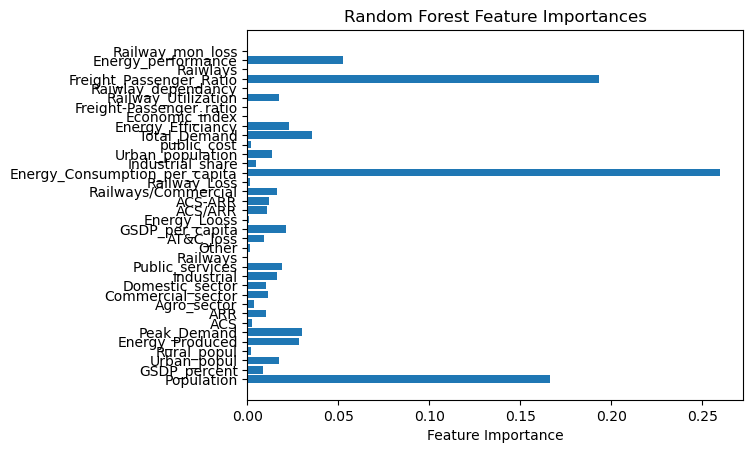

In [316]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X_train.columns
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [318]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Scale features (important for some models)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Hyperparameter tuning (Gradient Boosting)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

# Best models
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Best Random Forest R²: {r2_rf:.4f}")
print(f"Best Gradient Boosting R²: {r2_gb:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Random Forest R²: 0.8666
Best Gradient Boosting R²: 0.9532


In [320]:
y_pred = best_model.predict(X_test_scaled)
print("Final R² Score on Test Set:", r2_score(y_test_scaled, y_pred))

Final R² Score on Test Set: 0.9351024950760863


In [321]:
import pickle
with open('energy_req_prediction.pkl', 'wb') as f:
    pickle.dump(best_model, f)